Dec 7, 2018

Group 2

In [104]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [105]:
#import file
location= "datasets/Kickstartercombo.csv"
df = pd.read_csv(location)

In [106]:
#preview data
df.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.0,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN


In [107]:
df.tail()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
702406,702406,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,Documentary,US,canceled,50000.0,25.0,USD,2014-09-17 02:35:30,2014-10-17,1,25.0,50000.0,25.0
702407,702407,999977640,The Tribe,Film & Video,Narrative Film,US,failed,1500.0,155.0,USD,2011-06-22 03:35:14,2011-07-19,5,155.0,1500.0,155.0
702408,702408,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,Narrative Film,US,failed,15000.0,20.0,USD,2010-07-01 19:40:30,2010-08-16,1,20.0,15000.0,20.0
702409,702409,999987933,BioDefense Education Kit,Technology,Technology,US,failed,15000.0,200.0,USD,2016-01-13 18:13:53,2016-02-13,6,200.0,15000.0,200.0
702410,702410,999988282,Nou Renmen Ayiti! We Love Haiti!,Art,Performance Art,US,failed,2000.0,524.0,USD,2011-07-19 09:07:47,2011-08-16,17,524.0,2000.0,524.0


In [7]:
#get number of columns and rows
df.shape

(702411, 16)

In [8]:
#find total of null values
df.isnull().sum()

Unnamed: 0               0
ID                       0
name                     8
main_category            0
category                 0
country                  0
state                    0
goal                     0
pledged                  0
currency                 0
launched                 0
deadline                 0
backers                  0
usd pledged           7594
usd_goal_real       323750
usd_pledged_real    323750
dtype: int64

In [22]:
#get succesful values for state variable
  #  modelsu = df.loc[df['state']=='successful']

In [108]:
# df['state'].unique()

modelsu = df.loc[(df['state'] == 'successful') | (df['state'] == 'failed')] 

In [109]:
modelsu.head()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN
5,5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.0,NaN,NaN


In [25]:
#find sum of null values for successful state
modelsu.isnull().sum()

Unnamed: 0               0
ID                       0
name                     0
main_category            0
category                 0
country                  0
state                    0
goal                     0
pledged                  0
currency                 0
launched                 0
deadline                 0
backers                  0
usd pledged            210
usd_goal_real       113248
usd_pledged_real    113248
dtype: int64

In [27]:
#find duplicates
dupe=modelsu.duplicated()
modelsu.loc[dupe]

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real


No duplicates were found

In [112]:
#renamed Unnamed column Number
modelsu.rename(columns={'Unnamed: 0': 'Number'}, inplace=True)
modelsu.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,Number,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN
5,5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.0,NaN,NaN


In [113]:
#create an index using Number column
modelsu.set_index('Number', inplace=True)
modelsu.head()

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
Number,,,,,,,,,,,,,,,
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.0,NaN,NaN


In [115]:
#drop ID column
modelsu1=modelsu.drop('ID', axis=1)

In [42]:
#run correlation
#modelsu1.corr()

In [49]:
#corr=modelsu1.corr()
#sns.heatmap(corr,vmin=-1, annot=True)


In [ ]:
bins=[1,2,3,4,5]
rate=['canceled',']
      

In [90]:
modelsu['state'].unique()

array(['failed', 'successful'], dtype=object)

In [153]:
modelsu['state'] = df['state'].map({'failed':0, 'successful':1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
#df['state'].groupby(df['main_category']).mean()

In [117]:
modelsu.head()

,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
Number,,,,,,,,,,,,,,,
0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,0.0,1000.0,0.0,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.0,NaN,NaN
1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,0.0,45000.0,220.0,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.0,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,0.0,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,1.0,50000.0,52375.0,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.0,NaN,NaN
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,1.0,1000.0,1205.0,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.0,NaN,NaN


In [76]:
df.tail()

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
702406,702406,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,Documentary,US,1,50000.0,25.0,USD,2014-09-17 02:35:30,2014-10-17,1,25.0,50000.0,25.0
702407,702407,999977640,The Tribe,Film & Video,Narrative Film,US,0,1500.0,155.0,USD,2011-06-22 03:35:14,2011-07-19,5,155.0,1500.0,155.0
702408,702408,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,Narrative Film,US,0,15000.0,20.0,USD,2010-07-01 19:40:30,2010-08-16,1,20.0,15000.0,20.0
702409,702409,999987933,BioDefense Education Kit,Technology,Technology,US,0,15000.0,200.0,USD,2016-01-13 18:13:53,2016-02-13,6,200.0,15000.0,200.0
702410,702410,999988282,Nou Renmen Ayiti! We Love Haiti!,Art,Performance Art,US,0,2000.0,524.0,USD,2011-07-19 09:07:47,2011-08-16,17,524.0,2000.0,524.0


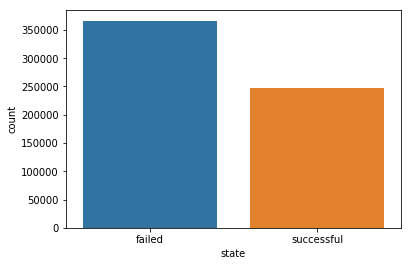

In [118]:
sns.countplot(x='state',data=modelsu1)

In [124]:
red=cat_sort_df=modelsu1.sort_values('main_category')

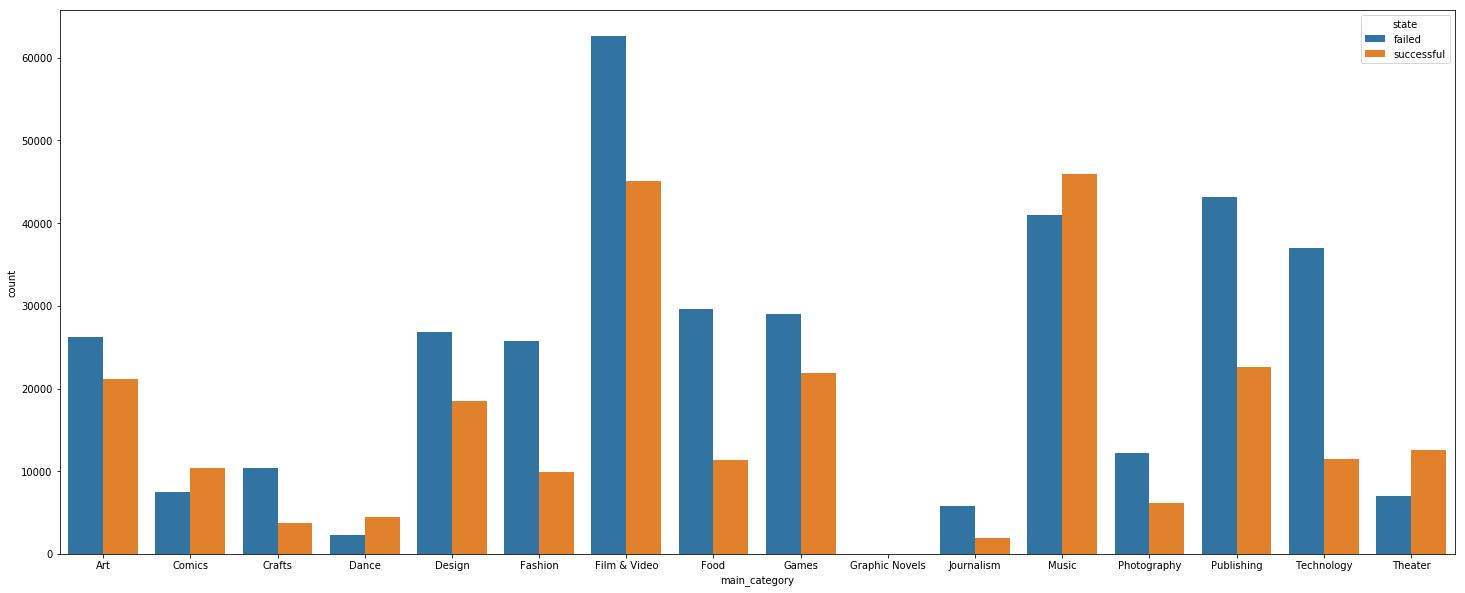

In [190]:
plt.subplots(figsize=(25,10))
sns.countplot(cat_sort_df['main_category'],hue=modelsu1['state'])

In [130]:
music = modelsu1.loc[(df['main_category'] == 'Music') ]

In [131]:
music.head()

,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
Number,,,,,,,,,,,,,,
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.0,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.0,NaN,NaN
10,Lisa Lim New CD!,Music,Indie Rock,US,successful,12500.0,12700.0,USD,2013-03-09 06:42:00,2013-04-08 06:42:00,100,12700.0,NaN,NaN
16,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.0,USD,2012-08-02 14:11:00,2012-08-17 14:11:00,7,250.0,NaN,NaN
22,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,US,successful,10000.0,15827.0,USD,2010-12-07 23:16:00,2011-01-06 23:16:00,147,15827.0,NaN,NaN
30,Chris Eger Band - New Nashville Record!,Music,Music,US,successful,12000.0,13260.0,USD,2014-07-14 22:35:00,2014-08-13 08:59:00,92,13260.0,NaN,NaN


In [132]:
musicdf=music.sort_values('category')

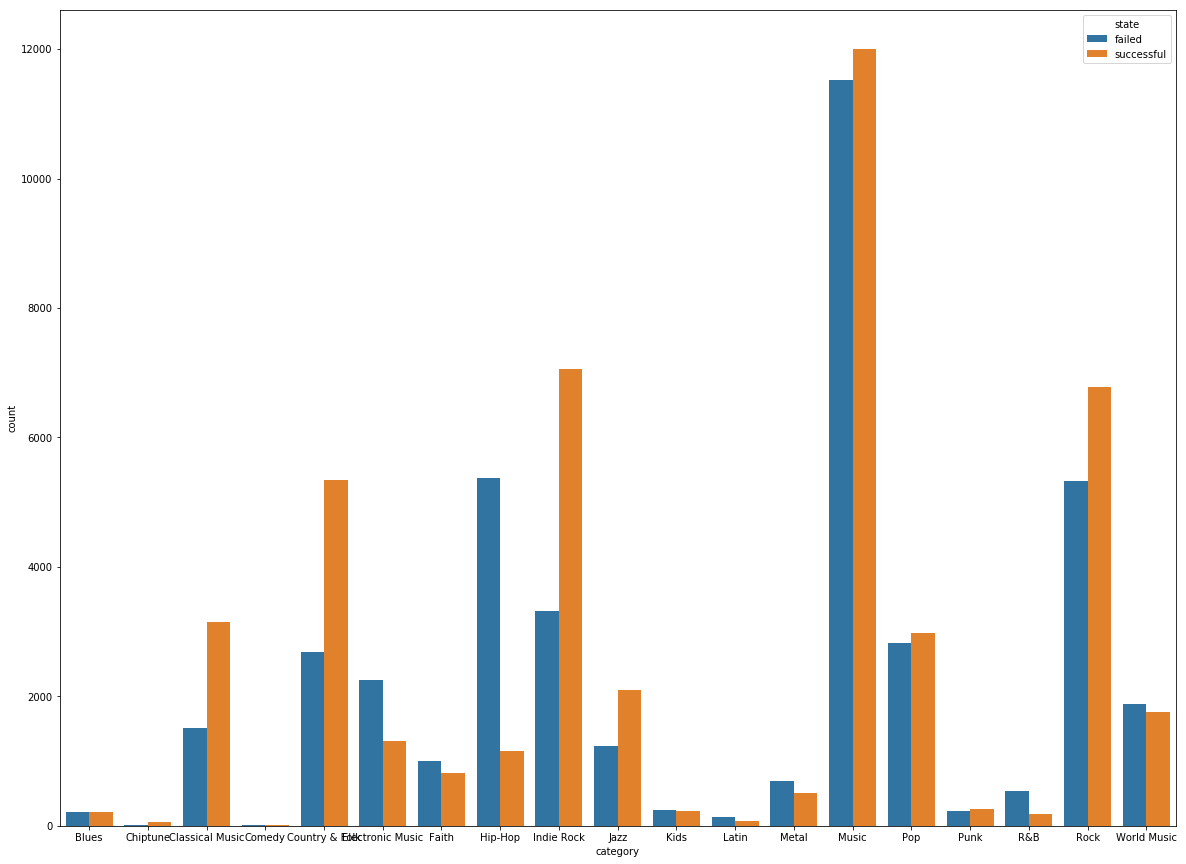

In [137]:
plt.subplots(figsize=(20,15))
sns.countplot(musicdf['category'],hue=musicdf['state'])

In [138]:
musicdf.shape

(86965, 14)

In [146]:
Indie = musicdf.loc[(df['category'] == 'Indie Rock') ]

In [151]:
Indie.head()

,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
Number,,,,,,,,,,,,,,
2619,Help The Rubbish Zoo make a New EP,Music,Indie Rock,US,successful,1000.0,1810.0,USD,2012-01-23 19:30:00,2012-02-22 19:30:00,31,1810.000000,NaN,NaN
421859,Anna Lombard Solo EP!,Music,Indie Rock,US,successful,5000.0,5110.0,USD,2011-12-12 13:54:03,2012-01-11,89,5110.000000,5000.0,5110.0
476123,"The Life Of Riley ""By The Way"" 2012 Album",Music,Indie Rock,US,successful,10000.0,12400.0,USD,2012-04-27 02:20:49,2012-05-27,152,12400.000000,10000.0,12400.0
305016,Preorder Ben Mason's new album 'She'd Need a H...,Music,Indie Rock,AU,successful,3000.0,3626.0,AUD,2015-04-19 03:35:00,2015-05-10 12:00:00,79,2818.530484,NaN,NaN
288134,Kirsten Adamson Début Album,Music,Indie Rock,GB,successful,2800.0,3428.0,GBP,2014-10-12 22:49:00,2014-11-11 22:49:00,114,5510.642698,NaN,NaN


In [148]:
Indie.shape

(10377, 14)

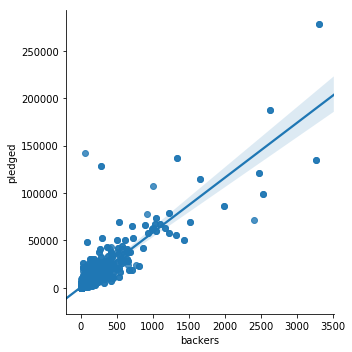

In [149]:
sns.lmplot(x='backers', y='pledged', data=Indie)

The more backers you have, the more pledges you have 

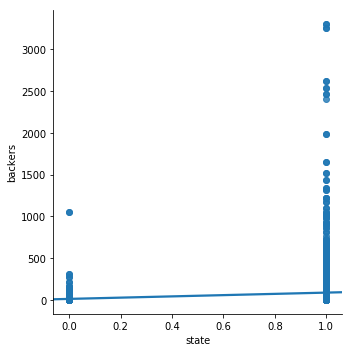

In [159]:
sns.lmplot(x='', y='backers', data=Indie)

In [155]:
Indie['state'] = Indie['state'].map({'failed':0, 'successful':1})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [157]:
Indie.head()

,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
Number,,,,,,,,,,,,,,
2619,Help The Rubbish Zoo make a New EP,Music,Indie Rock,US,1,1000.0,1810.0,USD,2012-01-23 19:30:00,2012-02-22 19:30:00,31,1810.000000,NaN,NaN
421859,Anna Lombard Solo EP!,Music,Indie Rock,US,1,5000.0,5110.0,USD,2011-12-12 13:54:03,2012-01-11,89,5110.000000,5000.0,5110.0
476123,"The Life Of Riley ""By The Way"" 2012 Album",Music,Indie Rock,US,1,10000.0,12400.0,USD,2012-04-27 02:20:49,2012-05-27,152,12400.000000,10000.0,12400.0
305016,Preorder Ben Mason's new album 'She'd Need a H...,Music,Indie Rock,AU,1,3000.0,3626.0,AUD,2015-04-19 03:35:00,2015-05-10 12:00:00,79,2818.530484,NaN,NaN
288134,Kirsten Adamson Début Album,Music,Indie Rock,GB,1,2800.0,3428.0,GBP,2014-10-12 22:49:00,2014-11-11 22:49:00,114,5510.642698,NaN,NaN


In [177]:
#Indie["Succ_Ratio"]= np.where(Indie['pledged'] / Indie['goal'] *100)

In [171]:
Indie.to_csv("Indiecat.csv",index=False)

In [176]:
#newdata= "Indiecat.csv"
#df = pd.read_csv(newdata)

In [178]:
Indie=Indie.drop('usd pledged', axis=1)

In [179]:
Indie=Indie.drop('usd_goal_real', axis=1)

In [180]:
Indie=Indie.drop('usd_pledged_real', axis=1)

In [181]:
Indie.head()

,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers
Number,,,,,,,,,,,
2619,Help The Rubbish Zoo make a New EP,Music,Indie Rock,US,1,1000.0,1810.0,USD,2012-01-23 19:30:00,2012-02-22 19:30:00,31
421859,Anna Lombard Solo EP!,Music,Indie Rock,US,1,5000.0,5110.0,USD,2011-12-12 13:54:03,2012-01-11,89
476123,"The Life Of Riley ""By The Way"" 2012 Album",Music,Indie Rock,US,1,10000.0,12400.0,USD,2012-04-27 02:20:49,2012-05-27,152
305016,Preorder Ben Mason's new album 'She'd Need a H...,Music,Indie Rock,AU,1,3000.0,3626.0,AUD,2015-04-19 03:35:00,2015-05-10 12:00:00,79
288134,Kirsten Adamson Début Album,Music,Indie Rock,GB,1,2800.0,3428.0,GBP,2014-10-12 22:49:00,2014-11-11 22:49:00,114


In [182]:
Indie.to_csv("Indiecat1.csv",index=False)

In [188]:
Indie['state'] = Indie['state'].map({0:'failed', 1:'successful'})

In [184]:
Indie.to_csv("Indiecat2.csv",index=False)

In [189]:
Indie.head()

,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers
Number,,,,,,,,,,,
2619,Help The Rubbish Zoo make a New EP,Music,Indie Rock,US,NaN,1000.0,1810.0,USD,2012-01-23 19:30:00,2012-02-22 19:30:00,31
421859,Anna Lombard Solo EP!,Music,Indie Rock,US,NaN,5000.0,5110.0,USD,2011-12-12 13:54:03,2012-01-11,89
476123,"The Life Of Riley ""By The Way"" 2012 Album",Music,Indie Rock,US,NaN,10000.0,12400.0,USD,2012-04-27 02:20:49,2012-05-27,152
305016,Preorder Ben Mason's new album 'She'd Need a H...,Music,Indie Rock,AU,NaN,3000.0,3626.0,AUD,2015-04-19 03:35:00,2015-05-10 12:00:00,79
288134,Kirsten Adamson Début Album,Music,Indie Rock,GB,NaN,2800.0,3428.0,GBP,2014-10-12 22:49:00,2014-11-11 22:49:00,114
